In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
df = pd.read_excel('PublicDomainMissionaryTexts2.xlsx')
df.head()

,Author,Book
0,Andrew Melrose,ALEXANDER MACKAY\nMISSIONARY HERO OF UGANDA\nB...
1,Anthony N. Grooves,"JOURNAL\nOF A\nRESIDENCE AT BAGDAD, \nDURING T..."
2,Charles Stanley,Printed in Hong Kong by\nTHE EMPIRE PRINTING C...
3,Clara S. Fielder,SISTER ABIGAIL\n(ABIGAIL TOWNSEND LUFFE)\nBY\n...
4,E. H. Broadbent,THE PILGRIM CHURCH\n\n\nBEING SOME ACCOUNT OF ...


In [3]:
#Data preprocessing and cleaning
import re
import string

def clean(text):
    text = str(text).lower() #making all text lowercase
    text = re.sub('\[.*?\]', '', text) #removing full stops and question marks
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) #removing digits
    text = re.sub('[''""...]', '', text)
    text = re.sub('\n', '', text)
    return text
cleaned = lambda x: clean(x)

In [4]:
df['Book'] = pd.DataFrame(df['Book'].apply(cleaned))
df.Book

0     alexander mackaymissionary hero of ugandabythe...
1     journalof aresidence at bagdad during the year...
2     printed in hong kong bythe empire printing com...
3     sister abigailabigail townsend luffebyclara s ...
4     the pilgrim churchbeing some account of the co...
5     the life  explorations of frederick stanley ar...
6     the king’s son or a memoir of billy bray theki...
7     dedicated to the memory ofgeneral george s bla...
8     a sketch of the lifeofrev joseph hardy neesima...
9     dan crawfordof luanzamissionary pioneerswho ca...
10    produced by al hainesfrontispiece i made a fir...
11    c t studdcricketer  pioneerbynorman p grubbhe ...
12    recollections of an evangelistorincidents conn...
Name: Book, dtype: object

In [5]:
#Pickle cleaned data for future use
df.to_pickle('df_book.pkl')

In [6]:
#Removing stopwords
stop_words = set(stopwords.words('english'))
df['Book'] = df['Book'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

In [9]:
#Word tokenization
t = ' '.join(df['Book'])
word_tokenize = [word for word in nltk.tokenize.word_tokenize(t) if word not in stop_words and len(word) > 3]

In [10]:
#Find most common words used in the documents
freq_words = nltk.FreqDist(t).most_common
freq_words

<bound method Counter.most_common of FreqDist({' ': 37155, 'e': 29151, 'a': 16996, 'r': 16825, 'n': 16319, 'i': 16280, 't': 16223, 's': 16040, 'o': 15133, 'l': 11158, ...})>

In [11]:
#create a document term matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(df.Book)
dtm_data = pd.DataFrame(dtm.toarray(), columns= tfidf.get_feature_names())
dtm_data.index = df.index
dtm_data

,aa,abandon,abandoned,abatement,abbie,abbies,aberdeen,aberdeenshire,abetting,abhor,...,zittau,zoroaster,zu,zugleich,zula,zululand,zwingli,älteren,état,über
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037545,0.012515,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.017541,0.000000,0.000000,0.000000,0.000000,0.000000,0.017541,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.396038,0.024752,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.011155,0.011155,0.022309,0.011155,0.000000,0.000000,0.011155,0.022309,0.000000,0.022309
5,0.000000,0.010764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.015861,0.000000,0.000000,0.000000,0.000000,0.000000,0.018392,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018392,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.014306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.016589,0.033179,0.000000,0.000000,0.000000,0.000000


In [12]:
#pickle dtm for future use
dtm_data.to_pickle('Mission_dtm2.pkl')

In [13]:
#EDA
dtm_data_pkl = pd.read_pickle('Mission_dtm2.pkl')
dtm_data_pkl = dtm_data_pkl.transpose()
dtm_data_pkl.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
aa,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.017591
abandon,0.0,0.000000,0.0,0.000000,0.0,0.010764,0.0,0.000000,0.0,0.000000,0.0,0.011544,0.000000
abandoned,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.015861,0.0,0.014306,0.0,0.000000,0.000000
abatement,0.0,0.017541,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
abbie,0.0,0.000000,0.0,0.396038,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [16]:
#Top 30 worods used by each writer
top_dict = {}
for t in dtm_data_pkl.columns:
    top = dtm_data_pkl[t].sort_values(ascending=False).head(30)
    top_dict[t] = list(zip(top.index, top.values))
    
top_dict

{0: [('mackay', 0.6632941910583519),
  ('uganda', 0.17267943313320389),
  ('smith', 0.17226570714082412),
  ('zanzibar', 0.12514984736950036),
  ('lieutenant', 0.12514984736950036),
  ('work', 0.100387918279286),
  ('fever', 0.1001198778956003),
  ('missionary', 0.09806258447366811),
  ('africa', 0.08632576586979757),
  ('time', 0.0849651489945361),
  ('dr', 0.07847796897254325),
  ('society', 0.07847796897254325),
  ('caravans', 0.07508990842170023),
  ('engineering', 0.07508990842170023),
  ('nyanza', 0.07508990842170023),
  ('sadani', 0.07508990842170023),
  ('edinburgh', 0.06897876647320025),
  ('great', 0.068446307917695),
  ('way', 0.06372386174590207),
  ('boat', 0.0627823751780346),
  ('neill', 0.06257492368475018),
  ('wilson', 0.06257492368475018),
  ('quinine', 0.06257492368475018),
  ('mind', 0.06245445949137025),
  ('river', 0.06035642066405022),
  ('life', 0.059475604296175266),
  ('men', 0.059320133528669),
  ('dark', 0.05754340098638178),
  ('god', 0.055227346846448463)

In [19]:
#Check the top 15 words used by each author
for author, top_words in top_dict.items():
    print(author)
    print(', '.join([word for word, count in top_words[:14]]))
    print('---')

0
mackay, uganda, smith, zanzibar, lieutenant, work, fever, missionary, africa, time, dr, society, caravans, engineering
---
1
pasha, steam, lord, ordinance, arabic, india, god, mr, bombay, euphrates, european, place, armenian, ordination
---
2
lord, god, sheffield, preaching, said, scarborough, gathered, word, years, preach, spirit, christ, chapter, sell
---
3
abbie, mother, abigail, sister, dear, little, child, god, lord, townsend, jesus, said, tell, müller
---
4
churches, der, des, history, und, reformation, church, persecution, translated, brethren, bosnia, geschichte, asia, testament
---
5
arnot, africa, time, oxen, khama, shoshong, fred, waggons, boers, town, zambesi, journey, natives, work
---
6
billy, lord, bray, pray, converted, hell, said, went, man, god, drunk, drunkard, mercy, soul
---
7
car, soldiers, didn, germany, home, house, years, uganda, debbie, memories, uschi, remember, mother, american
---
8
neesima, japan, japanese, ship, god, mr, prince, time, hardy, captain, wo

In [23]:
#Look at the most common top words and add it to the list of stop words
#Pull out the top words for each author
from collections import Counter

words = []
for author in dtm_data_pkl.columns:
    top = [word for (word, count) in top_dict[author]]
    for t in top:
        words.append(t)
        
words

['mackay',
 'uganda',
 'smith',
 'zanzibar',
 'lieutenant',
 'work',
 'fever',
 'missionary',
 'africa',
 'time',
 'dr',
 'society',
 'caravans',
 'engineering',
 'nyanza',
 'sadani',
 'edinburgh',
 'great',
 'way',
 'boat',
 'neill',
 'wilson',
 'quinine',
 'mind',
 'river',
 'life',
 'men',
 'dark',
 'god',
 'church',
 'pasha',
 'steam',
 'lord',
 'ordinance',
 'arabic',
 'india',
 'god',
 'mr',
 'bombay',
 'euphrates',
 'european',
 'place',
 'armenian',
 'ordination',
 'english',
 'important',
 'persian',
 'beer',
 'vulgar',
 'rivers',
 'navigation',
 'roman',
 'constantinople',
 'dialect',
 'little',
 'things',
 'moolah',
 'sultan',
 'major',
 'bishop',
 'lord',
 'god',
 'sheffield',
 'preaching',
 'said',
 'scarborough',
 'gathered',
 'word',
 'years',
 'preach',
 'spirit',
 'christ',
 'chapter',
 'sell',
 'felt',
 'read',
 'soul',
 'ignorance',
 'captain',
 'emery',
 'prayer',
 'led',
 'time',
 'sent',
 'sat',
 'york',
 'corinthians',
 'met',
 'lost',
 'great',
 'abbie',
 'mothe

In [24]:
#Aggregate the list and identify most common words along each article
Counter(words).most_common

<bound method Counter.most_common of Counter({'god': 9, 'work': 7, 'time': 7, 'lord': 6, 'great': 5, 'mr': 5, 'said': 5, 'man': 5, 'life': 4, 'years': 4, 'christ': 4, 'home': 4, 'father': 4, 'day': 4, 'africa': 3, 'little': 3, 'soul': 3, 'happy': 3, 'uganda': 2, 'missionary': 2, 'men': 2, 'church': 2, 'place': 2, 'english': 2, 'roman': 2, 'word': 2, 'preach': 2, 'chapter': 2, 'captain': 2, 'prayer': 2, 'led': 2, 'mother': 2, 'jesus': 2, 'brethren': 2, 'arnot': 2, 'converted': 2, 'went': 2, 'soon': 2, 'american': 2, 'america': 2, 'night': 2, 'service': 2, 'love': 2, 'mackay': 1, 'smith': 1, 'zanzibar': 1, 'lieutenant': 1, 'fever': 1, 'dr': 1, 'society': 1, 'caravans': 1, 'engineering': 1, 'nyanza': 1, 'sadani': 1, 'edinburgh': 1, 'way': 1, 'boat': 1, 'neill': 1, 'wilson': 1, 'quinine': 1, 'mind': 1, 'river': 1, 'dark': 1, 'pasha': 1, 'steam': 1, 'ordinance': 1, 'arabic': 1, 'india': 1, 'bombay': 1, 'euphrates': 1, 'european': 1, 'armenian': 1, 'ordination': 1, 'important': 1, 'persian':

In [26]:
new_stop_words = [word for word, count in Counter(words).most_common() if count > 7]
new_stop_words

['god']

In [27]:
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS.union(new_stop_words)

In [34]:
#Recreate the document term matrix
tfidf2 = TfidfVectorizer(stop_words=stop_words)
dtm = tfidf2.fit_transform(df.Book)
dtm_stop = pd.DataFrame(dtm.toarray(), columns=tfidf2.get_feature_names())
dtm_stop_index = df.index

In [35]:
#pickle the dtm for future use
dtm_stop.to_pickle('dtm_stop2.pkl')

In [37]:
#Create wordclouds for each author
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=150)
plt.rcParams['figure.figsize'] = [16, 6]
authors = df['Author']

ValueError: num must be 1 <= num <= 12, not 13

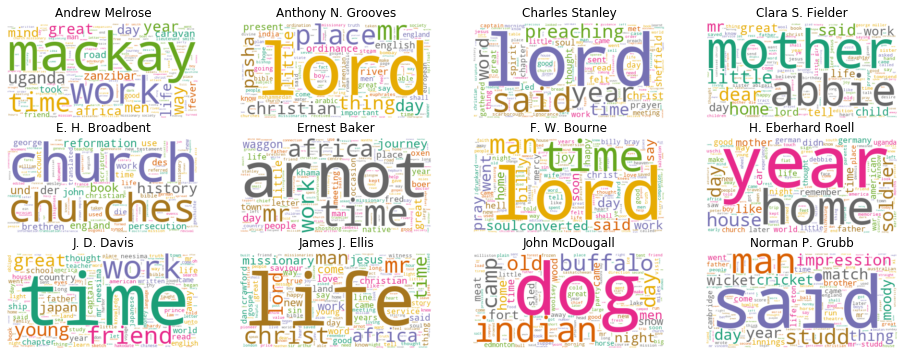

In [40]:
#create subplots for each author

for index, author in enumerate(dtm_data_pkl.columns):
    wc.generate(df.Book[author])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(authors[index])
    plt.savefig('Wc_missionary_trends2.png')
    
plt.show() 

In [41]:
#Find the number of unique words used by each author
unique_list = []
for author in dtm_data_pkl.columns:
    uniques = dtm_data_pkl[author].nonzero()[0].size
    unique_list.append(uniques)
    
#create a new dataframe that contains the uique word count
data_words = pd.DataFrame(list(zip(authors, unique_list)), columns=['Author', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


,Author,unique_words
2,Charles Stanley,1106
3,Clara S. Fielder,1177
6,F. W. Bourne,1177
12,Robert Gribble,1230
11,Norman P. Grubb,1235
8,J. D. Davis,1239
1,Anthony N. Grooves,1303
0,Andrew Melrose,1320
5,Ernest Baker,1388
9,James J. Ellis,1421


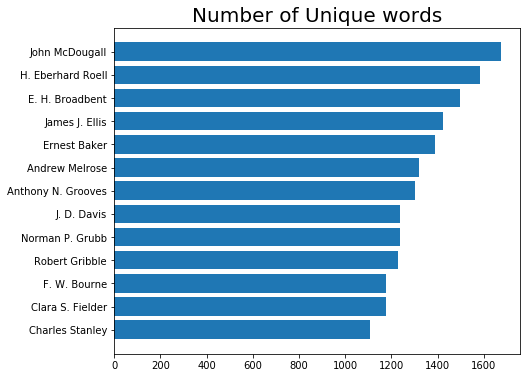

In [42]:
#plot unique words
y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.Author)
plt.title('Number of Unique words', fontsize= 20)
plt.savefig('Unique_words_mission_texts2.png')
plt.show()

In [43]:
#Carry out sentiment analysis
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['Book'].apply(pol)
df['subjectivity'] = df['Book'].apply(sub)
df

,Author,Book,polarity,subjectivity
0,Andrew Melrose,alexander mackaymissionary hero ugandabythe au...,0.107544,0.474338
1,Anthony N. Grooves,journalof aresidence bagdad years bymr anthony...,0.106560,0.440179
2,Charles Stanley,printed hong kong bythe empire printing compan...,0.135885,0.464773
3,Clara S. Fielder,sister abigailabigail townsend luffebyclara fe...,0.216083,0.519494
4,E. H. Broadbent,pilgrim churchbeing account continuancethrough...,0.136425,0.357446
5,Ernest Baker,life explorations frederick stanley arnotfrede...,0.125129,0.426624
6,F. W. Bourne,king’s son memoir billy bray theking’s son mem...,0.138482,0.500428
7,H. Eberhard Roell,dedicated memory ofgeneral george blanchard wh...,0.067133,0.404524
8,J. D. Davis,sketch lifeofrev joseph hardy neesima presiden...,0.127075,0.435022
9,James J. Ellis,dan crawfordof luanzamissionary pioneerswho ca...,0.207881,0.519064


In [44]:
#As expected all sentiments are positive

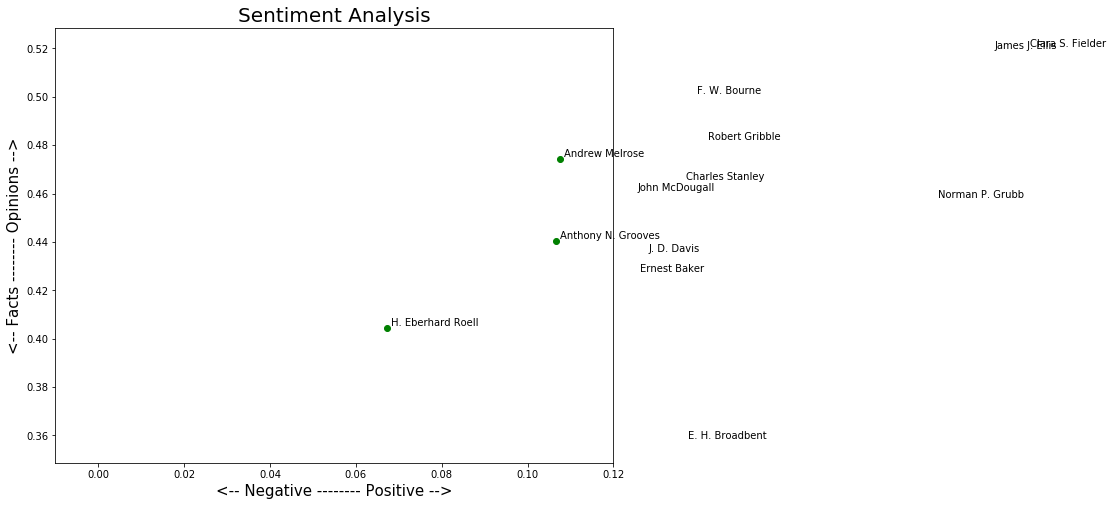

In [46]:
#plottitng the results
plt.rcParams['figure.figsize'] = [10, 8]
for index, author in enumerate(df.index):
    x = df.polarity.loc[author]
    y = df.subjectivity.loc[author]
    plt.scatter(x, y, color = 'green')
    plt.text(x+.001, y+.001, df['Author'][index], fontsize = 10)
    plt.xlim(-.01, .12)
    
plt.title('Sentiment Analysis', fontsize= 20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize = 15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize = 15)
plt.savefig('Sentiment_analysis_mission_text2.png')
plt.show()